<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Impute%20Missing%20Values/Impute_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [3]:
# check for missing values

df.isna().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
# check for percentage of missing values

df.isna().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
# make X and y

X = df.drop(columns=['Survived'])
y = df['Survived']

X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [7]:
# do the train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape,X_test.shape)

(712, 3) (179, 3)


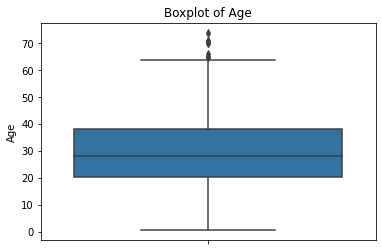

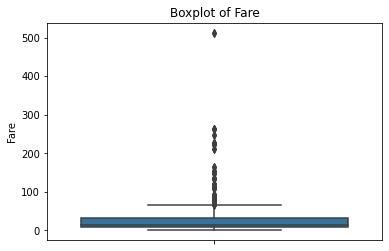

In [9]:
# check for outliers in age and fare columns

for col in X_train.columns[0:2]:
    sns.boxplot(y=col,data=X_train)
    plt.title('Boxplot of {}'.format(col))
    plt.show()

- The age column has very few outliers and its values can be imputed using the mean value.
- The fare column has a high number of outliers and its value should be filled by its median value.

**Note**:
> Age - Mean  
> Fare - median

In [10]:

mean_age = X_train['Age'].mean()
median_fare = X_train["Fare"].median()

print('The mean of age is',mean_age)
print('The median of fare is',median_fare)

The mean of age is 29.586187050359708
The median of fare is 14.4542


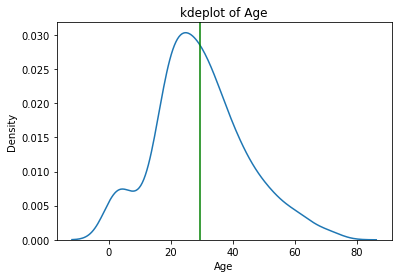

In [15]:
# Distribution of age

sns.kdeplot(x='Age',data=X_train)
plt.axvline(x=mean_age,color='green')
plt.title('kdeplot of Age')
plt.show()

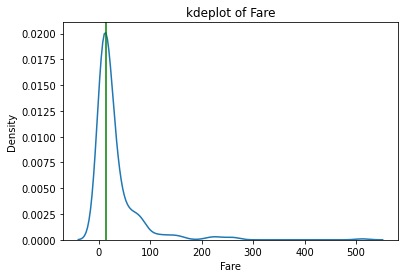

In [16]:
# Distribution of fare

sns.kdeplot(x='Fare',data=X_train)
plt.axvline(x=median_fare,color='green')
plt.title('kdeplot of Fare')
plt.show()

In [17]:
# impute the missing values

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

trans = ColumnTransformer(transformers=[
    ('age',SimpleImputer(strategy='mean'),['Age']),
    ('fare',SimpleImputer(strategy='median'),['Fare'])
],remainder='passthrough')

X_train_trans = trans.fit_transform(X_train)
X_test_trans = trans.transform(X_test)

In [20]:
X_train_df = pd.DataFrame(X_train_trans,columns=['Age','Fare','Family'])
X_train_df

,Age,Fare,Family
0,35.000000,7.1250,0.0
1,29.586187,13.0000,0.0
2,21.000000,8.0500,0.0
3,25.000000,55.4417,1.0
4,28.500000,16.1000,0.0
...,...,...,...
707,29.586187,7.7500,0.0
708,29.000000,7.0458,1.0
709,41.000000,39.6875,5.0
710,29.586187,7.8958,0.0


In [21]:
# check for missing values

X_train_df.isna().sum()

Age       0
Fare      0
Family    0
dtype: int64

In [25]:
# check out the mean and median value

print(trans.named_transformers_['age'].statistics_,mean_age)

print(trans.named_transformers_['fare'].statistics_,median_fare)

[29.58618705] 29.586187050359708
[14.4542] 14.4542


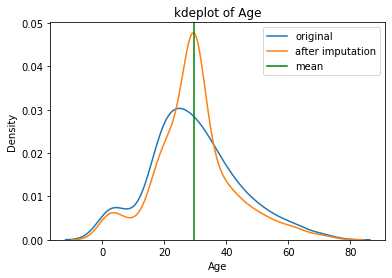

In [29]:
# Distribution of age after imputation

sns.kdeplot(x='Age',data=X_train,label='original')
sns.kdeplot(x='Age',data=X_train_df,label='after imputation')
plt.axvline(x=mean_age,color='green',label='mean')
plt.title('kdeplot of Age')
plt.legend()
plt.show()

- The distribution of age after imputation changed a lot

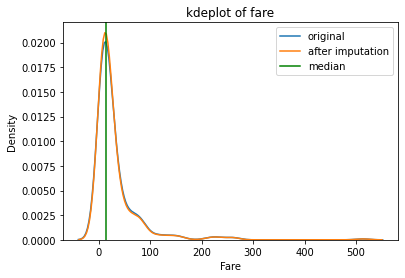

In [30]:
# Distribution of Fare after imputation

sns.kdeplot(x='Fare',data=X_train,label='original')
sns.kdeplot(x='Fare',data=X_train_df,label='after imputation')
plt.axvline(x=median_fare,color='green',label='median')
plt.title('kdeplot of fare')
plt.legend()
plt.show()

- The distribution of the fare column did not change that much even after the imputation of values

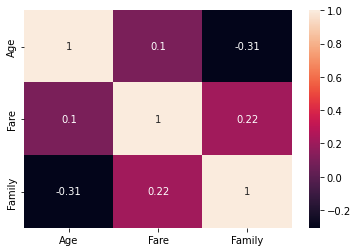

In [32]:
# checking correlation among columns before imputation

sns.heatmap(X_train.corr(),annot=True)

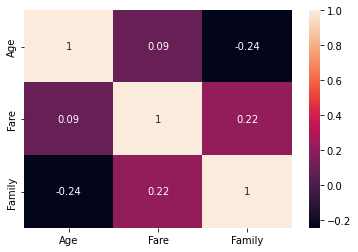

In [33]:
# checking correlation of columns after imputation
sns.heatmap(X_train_df.corr(),annot=True)

- The correlation values did not change that much even after the imputation

In [34]:
# change in corr values

(X_train.corr()) - (X_train_df.corr())

,Age,Fare,Family
Age,0.000000,0.009400,-0.062109
Fare,0.009400,0.000000,0.002555
Family,-0.062109,0.002555,0.000000


In [36]:
# checking covariance among columns before imputation

X_train.cov()

,Age,Fare,Family
Age,211.448202,75.098602,-6.741073
Fare,75.098602,2350.105721,17.909846
Family,-6.741073,17.909846,2.797863


In [37]:
# checking covariance of columns after imputation
X_train_df.cov()

,Age,Fare,Family
Age,165.054503,55.019454,-5.262019
Fare,55.019454,2254.407734,17.126530
Family,-5.262019,17.126530,2.797863


In [38]:
# cahnge in covariance values

(X_train.cov()) - (X_train_df.cov())

,Age,Fare,Family
Age,46.393698,20.079147,-1.479054e+00
Fare,20.079147,95.697987,7.833157e-01
Family,-1.479054,0.783316,4.884981e-15


The covariance values did change a lot after imutation.